# Optimization

files = spnbmd.csv

### Intro

This week, we're talking about *optimization*. Economics can, in my opinion, be succinctly described as the study of incentives and optimization. Incentives impact how people (agents) respond to the system they are subject to, whether we're referring to opportunity costs, budgets, or macroeconomic factors. Optimization describes how we determine our actions. 

Of course, optimization is a *huge* field unto itself, and I would highly recommend taking at least one course in it before you graduate. It is highly relevant in computer science, economics, statistics, mathematics, and engineering (such as operations research). Today I'm just going to talk about what optimization "is", and some basic applications of it in the context of economics.

#### Microeconomics

Here's a simple example that you may have seen in your micro courses. A consumer wants to maximize their utility--whether it's deciding between goods, or trading off between labor and leisure--but they also have to take their budget into account. The "budget problem"[1] can be written as 

\begin{align}
v(p,w) &= \max\limits_{x\in B(p,w)} u(x) \\
s.t. p \cdot x &\leq w
\end{align}

This reads as "$v$, a function of $(p,w)$, is the maximum utility achievable such that the prices $p$ and quantities $x$ are less than or equal to the budget $w$." We are maximizing over the permutations of goods $x$; $x$ may be two or three goods, and so we are looking to find which combination of them gives us the most utility given our limited resources.

[1]: Dan Quint's Econ 711 Notes; Jonathan Levin's [Online Micro Notes](https://web.stanford.edu/~jdlevin/teaching.html) on consumer theory

#### Macroeconomics

In macroeconomics, we often are concerned with what's happening in the economy as a whole. You may have heard of the idea of a "social planner," a deity who plans out the economy to maximize the utility of everyone. One of the most basic social planning problems you'll encounter is the Overlapping Generations (OLG) model [2]. 

Say that there is an economy in which at any time, people are either young or old. You die after living for exactly two time periods. That is, the young are born in time $t$ and their parents were born in $t-1$. Each generation is born into the world with an *endowment* of nonstorable goods $w_1$, so that each generation gets the exact same amount of goods as their parents, and this budget has to last them their entire lives (you don't earn more while you're alive), but they can't take any leftovers with them to the next period. The social planner, then, wants to optimize utility as

\begin{align}
\max\limits_{(c^t_t, c^{t-1}_t)} \; &u(c^t_t) + u(c^{t-1}_t) \\
s.t.\quad   c^t_t + c^{t-1}_t &\leq w_1
\end{align}

Subscript $t$ is the time period, and the superscripts tell us who is "young" or "old" at $t$.

What's happening here is, the social planner wants to maximize total utility for everyone alive at each point, given that there's exactly one pot of goods $w_1$ to split up amongst the people, but we have to satisfy both the young $c^t_t$ and the old $c^{t-1}_t$.

The trivial answer to this setup is that you would enforce consumption smoothing so that everyone only gets to consume half of what they're born with. Since the goods are nonstorable, they have to be consumed in time period $t$, so the best answer is to then take half from their children when they in turn are the elderly.

As you may have guessed, this type of problem is a very basic example for studying social security.

[2]: From Dean Corbae's excellent [notes on macroeconomics](https://sites.google.com/a/wisc.edu/deancorbae/teaching), handout [1](https://02e278dc-a-bf4ca052-s-sites.googlegroups.com/a/wisc.edu/deancorbae/teaching/Handout712_Intro_F20.pdf?attachauth=ANoY7coI7kXiLjNNAQGPdzSMwg6Xeve0OuxCcVfJ1G47_5hW_blu1KDoGI_jsR068l3VWJRiu9m1NXqdQfJfP4a2rocjt6VFGokUjXMJ45BKOhINdCpxl6tke1VlnvVNeOiqZjXryPUW-HTh5vKgaYGwDNyA2IO7yCqEMgLxOcWA5qLSsoBgvijViDXP3pNxlNTkD5RJw6g3Ft34ypNm3d4qWoD2Fg3lakkAmtJCUC9NZ0jReHa_HEw%3D&attredirects=0)

#### Econometrics

Lastly, there's plenty of examples within econometrics itself. Recall that in the previous discussion on OLS, I said we can conceive of linear regression $y = x'\beta + \epsilon$ in a linear algebra context by solving the problem $Y = X\beta$. $X$ is a matrix where the columns are our data, and $Y$ the dependent variable. $\beta$ will be the coefficients. 

While solving our $Y = X\beta$ problem, we also have the issue of error $\epsilon$, which we'd ideally like to minimize. This is another optimization problem! The "best linear predictor"[3] minimizes mean squared error $S(\beta) = \mathbb{E} [(y - x'\beta)^2]$. That is,

$$ \beta = \arg \min\limits_{b \in \mathbb{R}^k} \mathbb{E} [(y - x'\beta)^2] $$

"arg" just means that our answer is the argument that solves the problem, not the result itself. $\arg\max f(x)$ is then "the $x$ that maximizes function $f(\cdot)$".

[3]: From Bruce Hansen's [*Econometrics*](https://www.ssc.wisc.edu/~bhansen/econometrics/), one of the most popular graduate textbooks for econ PhD students

#### How do we solve these problems?

The solutions to any of the above questions can sometimes be obtained by simple methods like calculating derivatives (remember that critical values tell us the max/min of an equation over an arbitrary interval), but other times the functions are not tractable, or can't be integrated/derived using conventional techniques.

What we turn to instead are *numerical methods*. By iteratively calculating our results and looking at the error between iterations, we can inch closer to the "true" answer in each iteration of the loop and then stop when necessary.

### Coding: The while loop

We covered a bunch of commands earlier in the year, but one that we didn't talk much about is `while`. 

A while loop command will continue to run until the condition specified is violated. So,

```python
x = 0
while x < 10000:
    x += 1
```

will continue to operate as long as `x < 10000` is true. On the 10,001st iteration, x will be equal to 10,000, so `x < 10000` is now false, and we end the loop.

This command is invaluable in optimization, as we can use the conditional statement to, for example, continue to re-calculate results until a desired error tolerance is specified (say we want our answer to be accurate to .00001). 

On the other hand, we also need to be careful in using it. If you accidentally specify a condition that is never false, your loop will run forever. This is called an *infinite loop* and, if you don't terminate it, it will run until it crashes your computer (this usually would take a very long time to happen, so you don't need to panic if you accidentally start an infinite loop).

The most common way to cancel a runaway command in the terminal is CTRL+C. In Jupyter, you can just hit the "Stop" button at the top of the window (the big square) and it will interrupt the code execution. If your code is taking up lots of resources on your computer, then it may take a few seconds to stop everything successfully.

In [41]:
# an example of an infinite loop
x = 0
y = 0
while x < 1:
    y += 1
    print(y)
    break

1


#### Geothmetic Meandian

Let's do a practice problem with `while`.

XKCD "invented" a method that combines the mean, median, and geometric mean into one (fake) metric, the [Geothmetic Meandian](https://xkcd.com/2435/):



<img src="geothmetic_meandian_2x.png" style="width: 400px;"/>

In [42]:
# Define our helper functions first

def mean(x):
    return sum(x)/len(x)

def median(x):
    x.sort()
    
    # even length -> midpoint of the (n/2)-1 and (n/2) points
    if len(x)%2 == 0: 
        med = (x[int(len(x)/2)-1] + x[int(len(x)/2)])/2
    # odd length -> just return (n-1)/2 - 1
    # ex: length 7 -> (7-1)/2 = index 3 is median
    else: 
        med = x[int((len(x)-1)/2)]    
    return(med)

def geom(x):
    product = 1
    for i in x: # product of all terms
        product*= i
    geomet = product**(1/len(x)) # nth root of the product
    return(geomet)

test = [1,2,3,4,5,6,7,8,9,10]

print("median:",median(test))

median: 5.5


In [45]:
# define the rest of the function
def gmdn(data,tol):
    err = 1e9 # large error just to get us started
    max_iter = 1000 # backstop!
    
    it = 0
    while (err > tol) and (it < max_iter):
        print(it, err)
        # components
        mea = mean(data)
        med = median(data)
        geo = geom(data)
        
        # error is "infinity"-norm (you can use other norms, too)
        err = max(abs(mea-med),abs(mea-geo),abs(med-geo))
        
        data = [mea,med,geo] # set our data to (mean,median,geom) for next iteration
        it += 1              # increment for max-iter
        
    # after convergence all three should be about the same, so just return one argument
    return(data)

test = [1,2,3,4,5,6,7,8,9,10]
test1 = [1,1,2,3,5]
tol = .00000001
print(gmdn(test,tol))
# print(gmdn(test1,tol))

0 1000000000.0
1 0.9712713118832346
2 0.3449379860464292
3 0.10085874062524258
4 0.03227853069233522
5 0.010618427304884825
6 0.0035272825118690676
7 0.0011741724822247335
8 0.00039124462951534156
9 0.00013039542968051876
10 4.346334375604499e-05
11 1.4487541385221903e-05
12 4.829158253727428e-06
13 1.6097164561301724e-06
14 5.365718784844375e-07
15 1.7885725611677117e-07
16 5.961908211560285e-08
17 1.987302677974867e-08
[5.250657870301528, 5.250657876925869, 5.250657870301527]


In [8]:
# An alternative from https://www.explainxkcd.com/wiki/index.php/Talk:2435:_Geothmetic_Meandian#Better_Python_implementations
import numpy as np

def F(x):
    return np.mean(x), np.exp(np.log(x).mean()), np.median(x)

def GMDN(x, tolerance=1e-6):
    while np.std(x) > tolerance:
        x = F(x)
    return x[0]

gmdtest = GMDN([1, 1, 2, 3, 5])
print(gmdtest)

2.0890583884421265


In [9]:
import timeit
testdata = [i for i in range(1,100)]
timed = timeit.timeit('gmdn(testdata,tol)',globals = globals(), number = 10)
print('first function:', timed)

timed2 = timeit.timeit('GMDN(testdata)',globals = globals(), number = 10)
print('second function:', timed2)

first function: 0.0007416250000460423
second function: 0.02554891700015105


### Economic Application: Econometrics

So, we've now see how `while` works. What about some economic applications?

Let's look at some nonparametric regression. This may sound like a bit of a misnomer, given that we will still be using parameters for our estimation, but what we mean by this is that we put no (well, fewer) restrictions on the shape of our regression. Now, our regression line is simply $y = m(x) + \epsilon$. 

One way that we can do this is with *kernel regression*. Say that we have data with a very nonlinear shape. I'll use the [bone mineral density](https://web.stanford.edu/~hastie/ElemStatLearn/data.html) data from *Elements of Statistical Learning* (which you will probably use if you take a machine learning course). 

In [46]:
import statsmodels.nonparametric as smn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

bones = pd.read_csv("spnbmd.csv")
print(bones.head())

   idnum ethnic   age  sex  spnbmd
0      1  White  11.2  mal   0.719
1      1  White  12.2  mal   0.732
2      1  White  13.2  mal   0.776
3      1  White  14.3  mal   0.781
4      2  White  12.7  mal   0.620


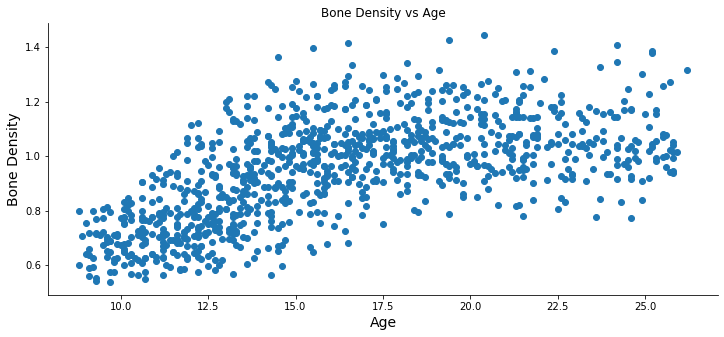

In [47]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()
ax.scatter(bones['age'],bones['spnbmd'], label = "data")

ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Bone Density', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Bone Density vs Age")

plt.show()

Clearly, we'd be off if we tried to use a linear regression. Additionally, a polynomial shape may be too biased for us to comfortably use. A kernel regression will find an optimal *bandwidth* and then estimate a line through each set of points. This way, we allow our data to "speak for itself" without grouping data points that may have different conditional densities (think about whether it makes sense to say the points at the far left should have the same functional form as the points at the far right).

What are we optimizing here? We want to solve

$$ \hat{m}_{nw}(x) = \arg\min\limits_{m} \sum\limits^n_{i=1} K(\frac{x_i - x}{h}) (y_i - m)^2$$

where $\hat{m}_{nw}(x)$ is the Nadaraya-Watson or *local constant* estimator, and $K(\cdot)$ is a *kernel  function* that we choose ourselves. The kernel function is like a weight that we place on our estimates $y$ given our $x$ values and bandwidth $h$.

In [48]:
# get the regression estimates
nonpar = smn.kernel_regression.KernelReg(bones['spnbmd'],bones['age'],
                                         var_type = 'c',reg_type = 'lc',bw = 'cv_ls')
npf = nonpar.fit()

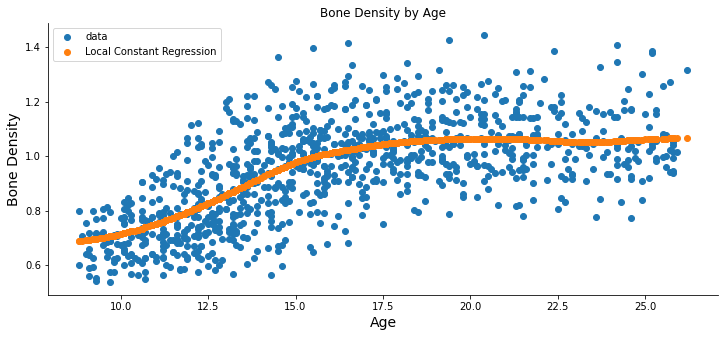

In [49]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()

ax.scatter(bones['age'],bones['spnbmd'], label = "data")
ax.scatter(bones['age'],npf[0], label = "Local Constant Regression")
ax.legend()
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Bone Density', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Bone Density by Age")

plt.show()

### Economic Application: Macro

For the last example of the week, I'll show you how you might use optimization in a macroeconomic problem.

(From an old problem set via [Garrett Anstreicher](https://www.garrettanstreicher.com/))

The setup: 

* You live forever ("infinitely-lived")
* You have log preferences: your marginal utility decreases as consumption increases, $u(c) = \ln(c)$
    * In 101 terms, this means each additional unit of consumption is less valuable to me than the one before
* Production by firms is Cobb-Douglass: $Y_t = Z_t K^\theta_t$
    * $K_t$ is capital in time $t$
    * $\theta = .36$ is the return to capital; increasing $K$ by 1% increases $Y$ by $\theta$%
    * $Z_t \in \{Z_g,Z_b\}$ is the productivity level. Firms have a probability of being in either a "good" productivity state, or a "bad" productivity state in each period. Think about this as being like the business cycle. $Z_g = 1.25$ and $Z_b = 0.2$.

* The transitions between "good" and "bad" states are a Markov process: $\Pi = \begin{bmatrix} 0.977 & 0.023 \\ 0.074 & 0.926 \end{bmatrix}$
    * Read the rows as "where we are now" and the columns as "where we'll be next period". So The top-left cell is $P(Z_{t+1} = Z_g | Z_t = Z_g) = 0.977$, the probability we stay in a good state given we are there now. Then the top-right cell is the probability you switch to a bad state.
* Capital depreciates at rate $\delta = 0.025$, meaning that anything you store (invest) until next period will decline in value. This is like the cost for having aging machinery, or trying to store your harvest for next season.
* Finally, households "discount" at rate $\beta = 0.99$. Think of this as how you weight the value of holding a dollar until next period compared to using it this period. Generally, we think of people as *slightly* preferring to have money *now* rather than in the future.

Let's put all of our model *primitives* together into one nice equation. The households are trying to **maximize their value** for their entire (infinite) lives. They need to consider their own consumption in each period while also remembering to invest some capital for the future. The "choice" in each period can be boiled down to how much capital to keep (we assume they consume everything else).

The **Value Function**, based on everything I've just told you, is

\begin{align}
V(K,Z) &= \max\limits_{K'} u(c) + \beta \sum\limits_{Z'} V(K',Z')\Pi(Z',Z) \\
c &= ZK^\theta + (1-\delta)K - K'
\end{align}

This is an example of a [Bellman Equation](https://en.wikipedia.org/wiki/Bellman_equation).

Let's code it up.

I'll start with the model primitives, and i'll introduce a Python structure known as a *class* in order to store it.

In [50]:
import numpy as np

In [51]:
class primitives:
    def __init__(self):
        # basic parameters
        self.beta = 0.99
        self.theta = 0.36
        self.delta = 0.025
        
        # capital grid
        self.kgrid = np.linspace(0.1,45.0,500)
        self.nk = len(self.kgrid)
        
        # Markov matrix
        self.mk = np.matrix([[0.977, 0.023], [0.074, 0.926]])
        self.z = np.array([1.25, 0.2])
        self.nz = np.size(self.z)
        
# this initializes our class, so I can now treat it as storing my attributes
pr = primitives()
print(pr.beta, pr.mk)

0.99 [[0.977 0.023]
 [0.074 0.926]]


In [53]:
pr.delta

0.025

Next, I'll create another class that stores my values at each gridpoint after estimation is done (the value function), and the optimal choice at each of those points (the policy function).

In [54]:
class results:
    # By default, these won't be defined until I give them values
    def __init__(self):
        self.val_func = None
        self.pol_func = None

Here, I'll define the function that calculates the value in each iteration.

In [22]:
def Bellman(prim,res):
    # empty grid for storing the utility calculations
    v_next = np.zeros((prim.nk,prim.nz))
    
    for i_k in range(0,prim.nk):
        # set my initial utility to be very, very low in both states
        max_cand = [-1e10,-1e10]
        
        # get the capital value from my grid
        k = prim.kgrid[i_k]
        
        # "budget" based on capital depreciation, output
        budget = prim.z*(k**prim.theta) + (1-prim.delta)*k
        
        # now go through K' values -> candidates for next period
        for i_kp in range(0,prim.nk):
            kp = prim.kgrid[i_kp]
            
            # consumption is budget minus savings
            c = budget - kp
            
            #c[0] is "good" state, c[1] "bad"
            if c[0] > 0:
                val = np.log(c[0]) + prim.beta*(res.val_func[i_kp,0]*prim.mk[0,0] + res.val_func[i_kp,1]*prim.mk[0,1])
                
                # check to see if this is better than our previous value
                if val > max_cand[0]:
                    max_cand[0] = val
                    res.pol_func[i_k,0] = kp
            if c[1] > 0:
                val = np.log(c[1]) + prim.beta*(res.val_func[i_kp,0]*prim.mk[1,0] + res.val_func[i_kp,1]*prim.mk[1,1])
                
                if val > max_cand[1]:
                    max_cand[1] = val
                    res.pol_func[i_k,1] = kp
        
        # we now have an update to our guess of the best value function
        v_next[i_k,:] = max_cand
    
    return(v_next,res.pol_func)


Lastly, I need a function to iteratively solve the model.

In [55]:
def Solve_model():
    prim = primitives()
    
    val_func = np.zeros((prim.nk, prim.nz))
    pol_func = np.zeros((prim.nk, prim.nz))
    res = results()
    res.val_func = val_func
    res.pol_func = pol_func
    
    error = 100
    n = 0
    
    while (error > .01) and (n < 100):
        n += 1
        
        v_next, res.pol_func = Bellman(prim,res)
        
        error = np.max(np.abs(v_next - res.val_func))
        res.val_func = v_next
        
        if n%20 == 0:
            print('Current error:',error,"Current n:",n)
        
        #print('Current error:',error,"Current n:",n)
    
    print('Value function converged in',n,'iterations')
    
    return(prim,res)

In [56]:
primtest,  restest = Solve_model()


Current error: 0.8951109108181363 Current n: 20
Current error: 0.6129418134995532 Current n: 40
Current error: 0.46809163651386143 Current n: 60
Current error: 0.37352109933362243 Current n: 80
Current error: 0.3030668441042792 Current n: 100
Value function converged in 100 iterations


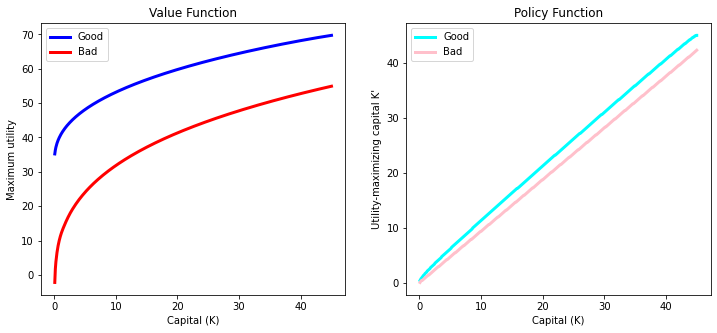

In [22]:
# plot the results
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(primtest.kgrid,restest.val_func[:,0], color = "blue", label = "Good", lw = 3)
ax[0].plot(primtest.kgrid,restest.val_func[:,1], color = "red", label = "Bad", lw = 3)
ax[0].legend()
ax[0].set_title("Value Function")
ax[0].set_xlabel('Capital (K)')
ax[0].set_ylabel('Maximum utility')

ax[1].plot(primtest.kgrid,restest.pol_func[:,0], color = "cyan", label = "Good", lw = 3)
ax[1].plot(primtest.kgrid,restest.pol_func[:,1], color = "pink", label = "Bad", lw = 3)
ax[1].legend()
ax[1].set_title("Policy Function")
ax[1].set_xlabel('Capital (K)')
ax[1].set_ylabel('Utility-maximizing capital K\'')

plt.show()

So, we see that this is quite an involved problem. Even worse is that in this implementation, it's quite slow. This is where we can exploit the differences between programming languages to improve our runtime.

Not all programming languages are created equally. In the Julia implementation that I showed you, the program runs quite quickly! This could mean one of two things. First, Python is just slow for certain things (somewhat true). Alternatively, it could mean that we have to think a little harder about how to implement this problem to take advantage of its strengths.

In Python, we could have improved our runtime by *vectorizing* the problem. That is, exploit the matrix multiplication properties that NumPy has to effectively run all of our iterations at once. Additionally, I suspect that using classes is not as quick in Python as structs are in Julia. Finally, I may be unintentionally slowing Python down by doing things like repeatedly calling NumPy functions, or having my arrays in the wrong orientation to quickly get do calculations.

## Takeaways

* Optimization underpins much of economics, particularly at the graduate level
* Furthermore, it's an interdisciplinary area of study that has a huge number of applications across different fields and occupations
* Knowing how we use it is vital in helping solve problems
* Be clever about how you implement optimization in your projects- you want to think about **time**, **accuracy**, and **efficiency**.